In [3]:
# %pip install wordcloud

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

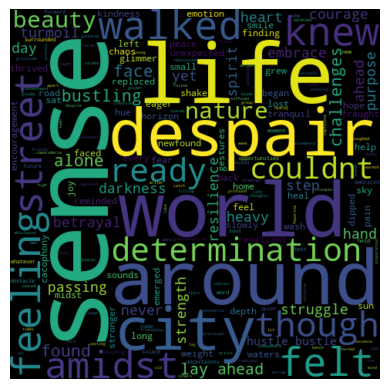

Words and emotions in our list are :
Word ->  victimized  Emotion->   cheated
Word ->  accused  Emotion->   cheated
Word ->  betrayed  Emotion->   cheated
Word ->  bright  Emotion->   happy
Word ->  calm  Emotion->   safe
Word ->  cheated  Emotion->   cheated
Word ->  cheerful  Emotion->   happy
Word ->  defeated  Emotion->   powerless
Word ->  determined  Emotion->   focused
Word ->  eager  Emotion->   attracted
Word ->  forced  Emotion->   powerless
Word ->  free  Emotion->   free
Word ->  gloomy  Emotion->   sad
Word ->  isolated  Emotion->   alone
Word ->  life  Emotion->  happy
Word ->  lost  Emotion->   lost
Word ->  melancholy  Emotion->   sad
Word ->  overwhelmed  Emotion->   powerless
Word ->  powerless  Emotion->   powerless
Word ->  replaced  Emotion->   hated
Word ->  threatened  Emotion->   fearful
Word ->  tranquil  Emotion->   happy
Word ->  trapped  Emotion->   entitled
Word ->  victimized  Emotion->   sad
Word ->  abandoned  Emotion->   hated
Word ->  alone  Emotion-> 

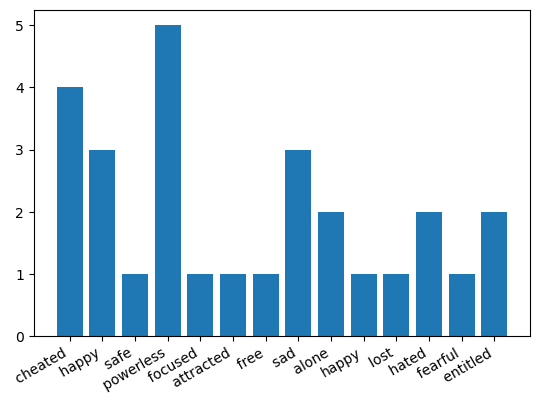

This text describes a  powerless post.


In [60]:
import string
from collections import Counter

import matplotlib.pyplot as plt
#import pyforest
# reading text file
text = open("read.txt", encoding="utf-8").read()

# converting to lowercase
lower_case = text.lower()

# Removing punctuations for clear analysis
#replacing blank with blank and deleting punctuation
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words after every space
tokenized_words = cleaned_text.split()

# these are the words that dont need to be analyses during sentiment analysis
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Removing stop words from the tokenized words list
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text = ' '.join(final_words)# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# NLP Emotion Algorithm
# 1) Check if the word in the final word list is also present in emotion.txt
#  - open the emotion file
#  - Loop through each line and clear it
#  - Extract the word and emotion using split

# 2) If word is present -> Add the emotion to emotion_list
# 3) Finally count each emotion in the emotion list

emotion_list = []
with open('emotions.txt', 'r') as file: #read only mode
    print("Words and emotions in our list are :")
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        #strip to remove extra spaces before and after
        word, emotion = clear_line.split(':')
    
        if word in final_words:
            emotion_list.append(emotion)
            print("Word -> ",word," Emotion-> ", emotion)
print("\nFrequency of emotions :")
w = Counter(emotion_list)
print(w,"\n")

# Plotting the emotions on the graph

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('emotions_graph.png')
plt.show()

# Get the emotion with the highest frequency
highest_emotion = max(w, key=w.get)

# Print the statement describing the text
print("This text describes a {} post.".format(highest_emotion))

In [61]:
import nltk
# nltk.download()

USING NLTK

{'neg': 0.192, 'neu': 0.6, 'pos': 0.208, 'compound': -0.3342}
Word ->  victimized  Emotion->   cheated
Word ->  accused  Emotion->   cheated
Word ->  betrayed  Emotion->   cheated
Word ->  bright  Emotion->   happy
Word ->  calm  Emotion->   safe
Word ->  cheated  Emotion->   cheated
Word ->  cheerful  Emotion->   happy
Word ->  defeated  Emotion->   powerless
Word ->  determined  Emotion->   focused
Word ->  eager  Emotion->   attracted
Word ->  forced  Emotion->   powerless
Word ->  free  Emotion->   free
Word ->  gloomy  Emotion->   sad
Word ->  isolated  Emotion->   alone
Word ->  life  Emotion->  happy
Word ->  lost  Emotion->   lost
Word ->  melancholy  Emotion->   sad
Word ->  overwhelmed  Emotion->   powerless
Word ->  powerless  Emotion->   powerless
Word ->  replaced  Emotion->   hated
Word ->  threatened  Emotion->   fearful
Word ->  tranquil  Emotion->   happy
Word ->  trapped  Emotion->   entitled
Word ->  victimized  Emotion->   sad
Word ->  abandoned  Emotion->   hated
W

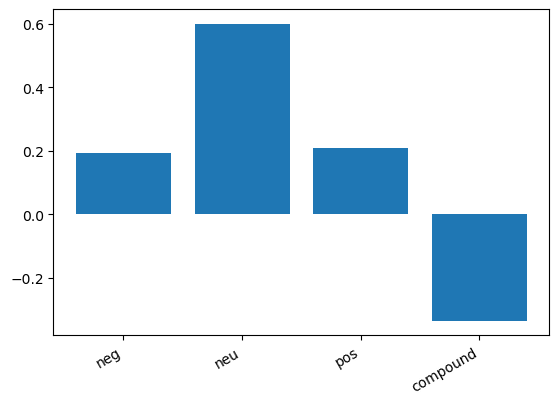

Most frequent word: sense
Definition: a general conscious awareness




In [4]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import ne_chunk, pos_tag
from nltk.tree import Tree

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

text = open('read.txt', encoding='utf-8').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize because it's faster than split()
tokenized_words = word_tokenize(cleaned_text, "english")

# Removing Stop Words and punctuation marks
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english') and word.isalnum():
        final_words.append(word)

# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)
# Define a custom lexicon with words and their sentiment types
custom_lexicon = { 
    # modified sentiment score
       'powerless': -24,
       'gloomy': -20,
       'eager':-10,
       'trapped':-2,
       'tranquill':-20
}

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Add custom lexicon to the VADER analyzer
sia.lexicon.update(custom_lexicon)

# Analyze the sentiment of the text
scores = sia.polarity_scores(cleaned_text)

# Print sentiment scores
print(scores)
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in final_words:
            emotion_list.append(emotion)
            print("Word -> ", word, " Emotion-> ", emotion)

# print(emotion_list)
w = Counter(emotion_list)
print(w)


pos_score = scores['pos']
neg_score = scores['neg']

# Display the sentiment analysis results using modified compound score
if scores['compound'] > 0:
    print("Positive Sentiment")
elif scores['compound'] < 0:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

# Generate a bar plot of emotion frequency
fig, ax1 = plt.subplots()
ax1.bar(scores.keys(), scores.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

# Check if final_words list is not empty
if final_words:
    # Find the most frequent word in final_words list
    most_common_word = Counter(final_words).most_common(1)[0][0]
    print("Most frequent word:", most_common_word)

    # Print the definition of the most frequent word
    synsets = wordnet.synsets(most_common_word)
    if synsets:
        print("Definition:", synsets[0].definition())
    else:
        print("No definition found.")
else:
    print("No words found after preprocessing.")

print("\n")




In [63]:
threshold=0.25
# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
term_matrix = count_vectorizer.fit_transform(final_words)

# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(term_matrix)

# Print the topics found by the LDA model
for index, topic in enumerate(lda.components_):
    print(f'Top 10 words for Topic #{index}')
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test = train_test_split(final_words, test_size=0.2, random_state=12)

# Create a CountVectorizer for parsing/counting words on training data
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
term_matrix_train = count_vectorizer.fit_transform(X_train)

# Fit the LDA model on training data
lda = LatentDirichletAllocation(n_components=5, random_state=12)
lda.fit(term_matrix_train)

# Transform the test data using the fitted CountVectorizer
term_matrix_test = count_vectorizer.transform(X_test)

# Use the fitted LDA model to predict topics on the test data
test_topics = lda.transform(term_matrix_test)

# analyzing the distribution of topics in the test documents
for i, test_document in enumerate(X_test):
    
    # Predict the topic distribution for the test document
    test_topic_distribution = lda.transform(count_vectorizer.transform([test_document]))
    
    # Identify the dominant topic for the test document
    dominant_topic = test_topic_distribution.argmax()
    
    # If no topic probabilities exceed the threshold, consider the dominant topic as null
    if all(prob <= threshold for prob in test_topic_distribution[0]):
        dominant_topic = None
    
    # Print the test document and its dominant topic only if the dominant topic is not null
    if dominant_topic is not None:
        print(f"Test Document #{i + 1}: {test_document}")
        print("Topic Distribution:")
        for topic_idx, topic_prob in enumerate(test_topic_distribution[0]):
            print(f"Topic {topic_idx}: Probability {topic_prob}")
        print(f"Dominant Topic: {dominant_topic}\n")

Top 10 words for Topic #0
['come', 'finding', 'tranquil', 'resilient', 'step', 'embrace', 'hustle', 'betrayal', 'bustling', 'sense']


Top 10 words for Topic #1
['nature', 'hand', 'heart', 'challenges', 'beauty', 'streets', 'felt', 'walked', 'knew', 'feeling']


Top 10 words for Topic #2
['unexpected', 'faced', 'face', 'heavy', 'strength', 'like', 'lay', 'despair', 'ahead', 'life']


Top 10 words for Topic #3
['waters', 'newfound', 'bustle', 'turmoil', 'resilience', 'passing', 'courage', 'day', 'ready', 'amidst']


Top 10 words for Topic #4
['began', 'joy', 'replaced', 'spirits', 'eager', 'purpose', 'darkness', 'city', 'determination', 'world']


Test Document #8: feeling
Topic Distribution:
Topic 0: Probability 0.10000532281074384
Topic 1: Probability 0.1000057156548108
Topic 2: Probability 0.10000433059781144
Topic 3: Probability 0.5999808001506349
Topic 4: Probability 0.10000383078599907
Dominant Topic: 3

Test Document #16: despair
Topic Distribution:
Topic 0: Probability 0.1000063